### Importing packages

In [1]:
import cv2
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt
import itertools
import numpy as np

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder

### Dataset Loading

In [2]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for file in glob.iglob(folder + '**/*.jpg', recursive=True):
        img = cv2.imread(file, 0)
        img = cv2.resize(img, (30, 30))
        if img is not None:
            images.append(np.array(img).reshape(900))
            labels.append(file.split("/")[-2])
    return images, labels

In [3]:
train_path = "./data"
class_names = os.listdir(train_path)

In [4]:
print(class_names)

['.DS_Store', 'with_mask', 'without_mask']


### dataset handling

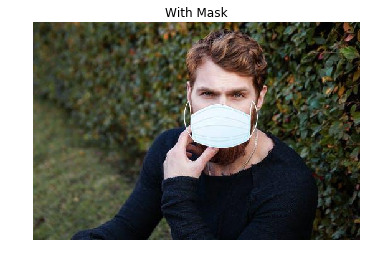

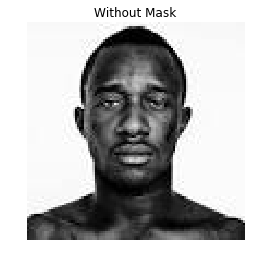

In [5]:
# Sample datasets images
image_with_mask = cv2.imread(train_path + "/with_mask/with_mask_1.jpg")
plt.imshow(cv2.cvtColor(image_with_mask, cv2.COLOR_BGR2RGB))
plt.title("With Mask")
plt.axis('off')
plt.show()

image_without_mask = cv2.imread(train_path + "/without_mask/without_mask_1.jpg")
plt.imshow(cv2.cvtColor(image_without_mask, cv2.COLOR_BGR2RGB))
plt.title("Without Mask")
plt.axis('off')
plt.show()

In [6]:
with_maskImage = os.listdir(train_path + "/with_mask")
without_maskImage = os.listdir(train_path + "/without_mask/")

In [7]:
if not os.path.isdir("./train"):
    os.mkdir('./train')
    os.mkdir('./train/without_mask')
    os.mkdir('./train/with_mask')
if not os.path.isdir("./test"):
    os.mkdir('./test')
    os.mkdir('./test/with_mask')
    os.mkdir('./test/without_mask')

In [8]:
with_mask_train_len = int(np.round(0.7 * len(with_maskImage), 0))

for i in range(with_mask_train_len):
    shutil.copy(
        os.path.join(train_path + "/with_mask", with_maskImage[i]),
        './train/with_mask')

for i in range(with_mask_train_len, len(with_maskImage)):
    shutil.copy(
        os.path.join(train_path + "/with_mask/", with_maskImage[i]),
        './test/with_mask')

without_mask_train_len = int(np.round(0.6 * len(without_maskImage), 0))
without_mask_val_len = int(np.round(0.7 * len(without_maskImage), 0))

for i in range(without_mask_train_len):
    shutil.copy(
        os.path.join(train_path + "/without_mask", without_maskImage[i]),
        './train/without_mask')

for i in range(with_mask_train_len, len(without_maskImage)):
    shutil.copy(
        os.path.join(train_path + "/without_mask", without_maskImage[i]),
        './test/without_mask')

In [9]:
X_train, y_train = load_images_from_folder('./train/')
X_test, y_test = load_images_from_folder('./test/')

### dataset preparation

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [11]:
X_train.shape, X_test.shape

((4905, 900), (2337, 900))

In [12]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

### modeling

#### Multilayer perceptron neural network

In [13]:
# defining the model using Multilayer perceptron neural network
mlp = MLPClassifier(hidden_layer_sizes=150,
                    activation='relu',
                    solver='adam',
                    batch_size=128,
                    verbose=1,
                    early_stopping=True)

In [14]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 15.56665716
Validation score: 0.588595
Iteration 2, loss = 10.29853435
Validation score: 0.558045
Iteration 3, loss = 5.92696625
Validation score: 0.619145
Iteration 4, loss = 4.94568681
Validation score: 0.641548
Iteration 5, loss = 4.07168454
Validation score: 0.668024
Iteration 6, loss = 3.61356041
Validation score: 0.696538
Iteration 7, loss = 3.26709014
Validation score: 0.678208
Iteration 8, loss = 3.17304872
Validation score: 0.680244
Iteration 9, loss = 2.46302015
Validation score: 0.723014
Iteration 10, loss = 2.45089758
Validation score: 0.708758
Iteration 11, loss = 2.20383786
Validation score: 0.668024
Iteration 12, loss = 2.25349239
Validation score: 0.741344
Iteration 13, loss = 1.88421793
Validation score: 0.755601
Iteration 14, loss = 1.82108569
Validation score: 0.757637
Iteration 15, loss = 2.19798899
Validation score: 0.651731
Iteration 16, loss = 1.73895023
Validation score: 0.712831
Iteration 17, loss = 1.89808745
Validation score: 0.739308
Iter

MLPClassifier(batch_size=128, early_stopping=True, hidden_layer_sizes=150,
              verbose=1)

In [15]:
pred = mlp.predict(X_test)

In [16]:
# evaluating accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=pred)
print(('MLP accuracy : {}'.format(accuracy)))

MLP accuracy : 0.7334189131364998


In [17]:
print("Classification Report of MLP")
print(classification_report(y_test, pred))

Classification Report of MLP
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1117
           1       0.75      0.74      0.74      1220

    accuracy                           0.73      2337
   macro avg       0.73      0.73      0.73      2337
weighted avg       0.73      0.73      0.73      2337



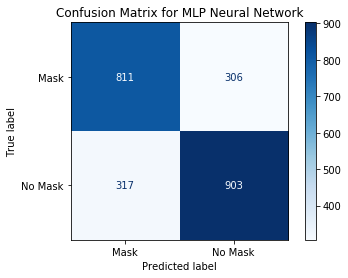

In [18]:
plot_confusion_matrix(mlp, X_test, y_test, cmap='Blues', display_labels=["Mask", "No Mask"])
plt.title("Confusion Matrix for MLP Neural Network")
plt.show()

Predicted Label: NO Mask


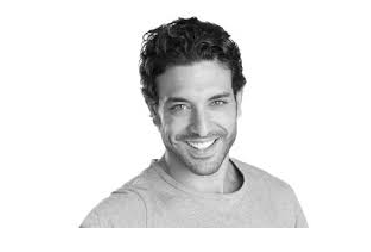

In [19]:
image_path = "./data/with_mask/with_mask_1008.jpg"
image_path = "./data/without_mask/without_mask_1000.jpg"
image = cv2.imread(image_path, 0)
plt.imshow(image, cmap='gray')
plt.axis('off')
image = cv2.resize(image, (30, 30))
image = np.array(image).reshape(900)
preds = mlp.predict([image])
if round(preds[0]) == 0:
    print("Predicted Label: Mask Detected")
else:
    print("Predicted Label: NO Mask")

#### XG Boosting

In [20]:
# xg boosting model defining
xgb = XGBClassifier(n_estimators=100,
                    max_depth=2, 
                    learning_rate=0.01)

In [21]:
xgb.fit(X_train.astype(np.float), y_train.astype(np.float))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
pred = xgb.predict(X_test)

In [23]:
# evaluating accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=pred)
print(('XG Boosting accuracy : {}'.format(accuracy)))

XG Boosting accuracy : 0.7569533590072742


In [24]:
print("Classification Report of XG Boosting")
print(classification_report(y_test, pred))

Classification Report of XG Boosting
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1117
           1       0.75      0.81      0.78      1220

    accuracy                           0.76      2337
   macro avg       0.76      0.75      0.75      2337
weighted avg       0.76      0.76      0.76      2337



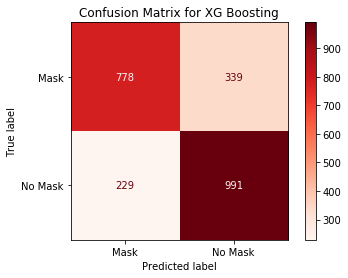

In [25]:
plot_confusion_matrix(xgb, X_test, y_test, cmap='Reds', display_labels=["Mask", "No Mask"])
plt.title("Confusion Matrix for XG Boosting")
plt.show()

Predicted Label: Mask Detected


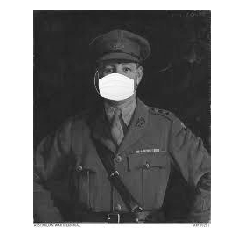

In [28]:
image_path = "./data/with_mask/with_mask_1008.jpg"
# image_path = "./data/without_mask/without_mask_1000.jpg"
image = cv2.imread(image_path, 0)
plt.imshow(image, cmap='gray')
plt.axis('off')
image = cv2.resize(image, (30, 30))
image = np.array(image).reshape(900)
preds = xgb.predict([image])
if round(preds[0]) == 0:
    print("Predicted Label: Mask Detected")
else:
    print("Predicted Label: NO Mask")